## Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Latar belakang pemilihan penggunaan BeautifulSoup dalam webscrapping data kurs USD ke Rupiah adalah BeautifulSoup merupakan sebuah library yang cukup sederhana untuk digunakan dalamm proses webscrapping dan data kurs USD ke Rupiah merupakan data yang cukup penting untuk digunakan dalam pekerjaan sehari-hari

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [11]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Tidak bisanya diinstall _speedups.cp38-win_amd64.pyd terkait dengan security yang ditetapkan pada laptop kantor yang digunakan

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup
web_address = "https://www.exchange-rates.org/history/IDR/USD/T"
web_content = requests.get(web_address).text
web_content_soup = BeautifulSoup(web_content, "html.parser")
div_table_responsive = web_content_soup.find('div', 'table-responsive')
List_of_USDIDR = []
table = div_table_responsive.find('table', 
        attrs={'class': 'table table-striped table-hover table-hover-solid-row table-simple history-data'})



## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = web_content_soup.find('table',attrs={'class': 'table table-striped table-hover table-hover-solid-row table-simple history-data'})

table_body = table.find('tbody')

print(table_body.prettify()[1:500])

tbody>
 <tr>
  <td>
   10/25/2021
  </td>
  <td>
   Monday
  </td>
  <td>
   <a href="/Rate/USD/IDR/10-25-2021">
    14,152.60477
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/IDR/10-25-2021">
    USD IDR rate for 10/25/2021
   </a>
  </td>
 </tr>
 <tr>
  <td>
   10/22/2021
  </td>
  <td>
   Friday
  </td>
  <td>
   <a href="/Rate/USD/IDR/10-22-2021">
    14,110.21079
   </a>
   IDR
  </td>
  <td class="text-narrow-screen-hidden">
   <a href="/Rate/USD/ID


Finding row length.

In [6]:
tablerows = table.find_all('tr')
row_length = len(tablerows)
print(row_length)

129


Do the scrapping process here (please change this markdown with your explanation)

Melakukan pengulangan untuk setiap baris agar dapat memperoleh nilai dari masing-masing kolom

In [7]:
List_of_USDIDR = [] #initiating a tuple
for table_rows in table_body.find_all('tr'):
    columns = table_rows.find_all('td')
    periode = columns[0].text
    fx_rate = columns[2].text.replace("IDR", "").replace(",", "").strip()
    
    List_of_USDIDR.append((periode,fx_rate))
List_of_USDIDR

[('10/25/2021', '14152.60477'),
 ('10/22/2021', '14110.21079'),
 ('10/21/2021', '14121.60389'),
 ('10/20/2021', '14079.51380'),
 ('10/19/2021', '14075.46229'),
 ('10/18/2021', '14056.43762'),
 ('10/15/2021', '14070.19147'),
 ('10/14/2021', '14105.27223'),
 ('10/13/2021', '14204.85164'),
 ('10/12/2021', '14214.84450'),
 ('10/11/2021', '14220.90165'),
 ('10/8/2021', '14217.98083'),
 ('10/7/2021', '14248.99612'),
 ('10/6/2021', '14245.00000'),
 ('10/5/2021', '14260.00000'),
 ('10/4/2021', '14262.54265'),
 ('10/1/2021', '14293.86378'),
 ('9/30/2021', '14298.48079'),
 ('9/29/2021', '14367.73186'),
 ('9/28/2021', '14271.16497'),
 ('9/27/2021', '14264.68406'),
 ('9/24/2021', '14272.18430'),
 ('9/23/2021', '14242.87856'),
 ('9/22/2021', '14299.15334'),
 ('9/21/2021', '14238.62381'),
 ('9/20/2021', '14235.10302'),
 ('9/17/2021', '14293.12609'),
 ('9/16/2021', '14250.19893'),
 ('9/15/2021', '14235.96566'),
 ('9/14/2021', '14244.84504'),
 ('9/13/2021', '14298.65671'),
 ('9/10/2021', '14226.67070'

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df_USDIDR = pd.DataFrame(List_of_USDIDR, columns = ('Periode','USDIDR'))#, 'description'))
df_USDIDR['Periode'] = df_USDIDR['Periode'].astype('datetime64')
df_USDIDR['USDIDR'] = df_USDIDR['USDIDR'].astype('float64')
df_USDIDR.head()


,Periode,USDIDR
0,2021-10-25,14152.60477
1,2021-10-22,14110.21079
2,2021-10-21,14121.60389
3,2021-10-20,14079.51380
4,2021-10-19,14075.46229


Dari data terlihat bahwa data yang dibuat sudah baik
sehingga hanya dilakukan set index untuk menentukan periode sebagai index data

In [9]:
df_USDIDR = df_USDIDR.set_index('Periode')
df_USDIDR.head()

,USDIDR
Periode,
2021-10-25,14152.60477
2021-10-22,14110.21079
2021-10-21,14121.60389
2021-10-20,14079.51380
2021-10-19,14075.46229


Dari data yang terbentuk yang dapat diklasifikasikan secara kronologis (data deret berkala / time series), sehingga ditentukan diagram baris (plot) adalah diagram yang paling cocok untuk menjelaskan data tersebut

<AxesSubplot:xlabel='Periode'>

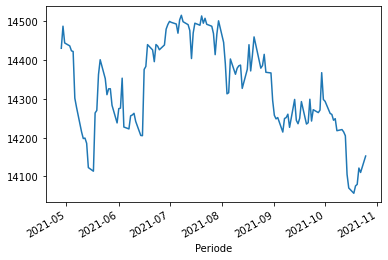

In [10]:
df_USDIDR['USDIDR'].plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Periode'>

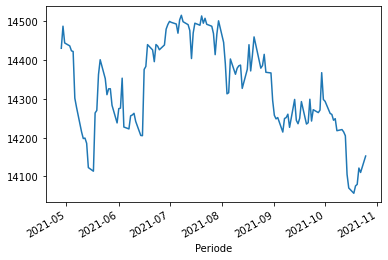

In [15]:
df_USDIDR['USDIDR'].plot()

- Penurunan harga dollar yang paling drastis terdapat pada periode awal bulan Mei 2021 sampai pertengahan Mei 2021
- Kenaikan harga dollar yang paling drastis terdapat pada periode pertengahan Mei 2021 sampai akhir Mei 2021 dan pertengahan Juni 2021 hingga Akhir Juni 2021
- Periode harga dollar yang cenderung stabil di kisaran 14400-14500 berada pada pertengahan Juni 2021 sampai awal Agustus 2021
-  Pada rentang waktu awal Agustus 2021 hingga akhir Agustus 2021, rentang kestabilan harga dollar menurun dan berada di kisaran 14300-14450
- Pada rentang waktu awal September 2021 hingga awal Oktober 2021, rentang kestabilan harga dollar kembali menurun dan berada di kisaran 14200-14300
- Harga terendah dollar berada pada pertengahan Mei 2021 dan pertengahan Oktober 2021




### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.